In [1]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import Generic_Functions as GF
#### This is how you import deep_autoviml
from deep_autoviml import deep_autoviml as deepauto

Imported Generic Functions.

Imported deep_auto_viml. version=0.0.31
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="auto",
		project_name="deep_autoviml", keras_options={}, model_options={}, 
		save_model_flag=True, use_my_model='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
datapath = 'C:/Users/Ram/Documents/Ram/Data_Sets/'
filename = 'titanic_train.csv'
train_datafile = datapath+filename
project_name = "churn"
target = 'Survived'
sep = ','

In [3]:
# load dataset
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head(1)

(838, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# split into input and output elements
#train, test = train_test_split(train, test_size=0.2, random_state=99)
filename = 'titanic_test.csv'
url = datapath + filename
test = pd.read_csv(url, header=0, sep=sep)
print(train.shape, test.shape)
test.head(1)

(838, 12) (53, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [5]:
keras_model_type =  "auto" ## always try "fast1" first, then "fast2", then "auto".
##  If NLP, use "BERT" and if image, use "image" for keras_model_type. ###
model_options = {"tuner":"optuna", 'nlp_char_limit':10, 'cat_feat_cross_flag':False, 'max_trials': 5}
keras_options = {"patience":10,'class_weight':True, "early_stopping": True, "epochs": 100}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    epochs : 100
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : False
    nlp_char_limit : 10
    max_trials : 5
    tuner : optuna

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of S

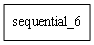

Model plot saved in file: deep_autoviml_churn_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using optuna Tuner...
    Class weights: {0: 1.0, 1: 1.3012422360248448}
After preprocessing using keras layers, features dimensions is now 130
    original datasize = 838, initial batchsize = 41
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Using optimizer = Adam obj
    Onecycle steps = 1100
    loss fn = <tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x0000022FA58C0A90>
    num predicts = 2, output_activation = sigmoid
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_c

[I 2021-06-04 12:27:27,035] A new study created in memory with name: churn_auto_study_87


Keras Learning Rate Scheduler = onecycle

Epoch 00044: ReduceLROnPlateau reducing learning rate to 9.297315882577094e-05.


[I 2021-06-04 12:30:13,228] Trial 0 finished with value: 0.7429853081703186 and parameters: {'n_layers': 3, 'n_units': 16, 'weight_decay': 2.5255865064722014e-08, 'use_bias': True, 'batch_norm': True, 'add_noise': True, 'dropout': 0.31472170395223104, 'activation': 'selu', 'kernel_initializer': 'he_normal', 'adam_learning_rate': 9.7866480625021e-05, 'optimizer': 'Adam', 'adam_epsilon': 8.210223911585632e-11}. Best is trial 0 with value: 0.7429853081703186.



Epoch 00049: ReduceLROnPlateau reducing learning rate to 8.83245033037383e-05.
Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.00010340958688175305.


[I 2021-06-04 12:31:17,687] Trial 1 finished with value: 0.4621901512145996 and parameters: {'n_layers': 5, 'n_units': 32, 'weight_decay': 4.563893334105812e-05, 'use_bias': True, 'batch_norm': False, 'add_noise': False, 'dropout': 0.49265939980869766, 'activation': 'relu', 'kernel_initializer': 'he_uniform', 'optimizer': 'Adam', 'adam_learning_rate': 0.00010885219350875101, 'adam_epsilon': 6.506482043115187e-13}. Best is trial 0 with value: 0.7429853081703186.



Epoch 00014: ReduceLROnPlateau reducing learning rate to 9.823910477280151e-05.
Restoring model weights from the end of the best epoch.
Epoch 00014: early stopping

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0009465068054851144.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0008991814596811309.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.0008542223949916661.

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.0008115112752420827.


[I 2021-06-04 12:34:00,046] Trial 2 finished with value: 0.7755354642868042 and parameters: {'n_layers': 1, 'n_units': 48, 'weight_decay': 2.0442681949318765e-06, 'use_bias': True, 'batch_norm': False, 'add_noise': True, 'dropout': 0.4900558019463763, 'activation': 'elu', 'kernel_initializer': 'he_uniform', 'adam_learning_rate': 0.03039299225684727, 'optimizer': 'SGD', 'sgd_opt_learning_rate': 0.0009963229588484533, 'sgd_opt_momentum': 0.8375770626470893}. Best is trial 2 with value: 0.7755354642868042.



Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.0007709357363637537.
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.020200102683156727.


[I 2021-06-04 12:35:39,269] Trial 3 finished with value: 0.7696952819824219 and parameters: {'n_layers': 1, 'n_units': 64, 'weight_decay': 1.3410288338160398e-08, 'use_bias': True, 'batch_norm': True, 'add_noise': False, 'dropout': 0.056524841094446554, 'activation': 'tanh', 'kernel_initializer': 'glorot_uniform', 'optimizer': 'Adam', 'adam_learning_rate': 0.02126326506242469, 'adam_epsilon': 2.008497221582025e-14}. Best is trial 2 with value: 0.7755354642868042.



Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.019190098345279693.
Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping

Epoch 00010: ReduceLROnPlateau reducing learning rate to 5.8566922962199894e-05.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 5.563857612287393e-05.


[I 2021-06-04 12:37:54,008] Trial 4 finished with value: 0.7332450151443481 and parameters: {'n_layers': 3, 'n_units': 64, 'weight_decay': 2.370448311504063e-08, 'use_bias': False, 'batch_norm': True, 'add_noise': False, 'dropout': 0.4797778840374715, 'activation': 'elu', 'kernel_initializer': 'he_normal', 'optimizer': 'Adam', 'adam_learning_rate': 6.164939017475841e-05, 'adam_epsilon': 9.625248305639884e-06}. Best is trial 2 with value: 0.7755354642868042.



Epoch 00037: ReduceLROnPlateau reducing learning rate to 5.285664610710228e-05.
Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Best trial score in Optuna: 0.7755354642868042
    Scores mean: 0.6967302441596985 std: 0.11833517998392248
    Best params: {'n_layers': 1, 'n_units': 48, 'weight_decay': 2.0442681949318765e-06, 'use_bias': True, 'batch_norm': False, 'add_noise': True, 'dropout': 0.4900558019463763, 'activation': 'elu', 'kernel_initializer': 'he_uniform', 'adam_learning_rate': 0.03039299225684727, 'optimizer': 'SGD', 'sgd_opt_learning_rate': 0.0009963229588484533, 'sgd_opt_momentum': 0.8375770626470893}

Best optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000022FAE570F10> and best learning_rate = 0.000996323

Tensorboard log directory can be found at: deep_autoviml\mylogs
Model training with best hyperparameters for 100 epochs
    Callback added: OneCycleScheduler object at 0x0000022FA6D5BA00>
    Callb

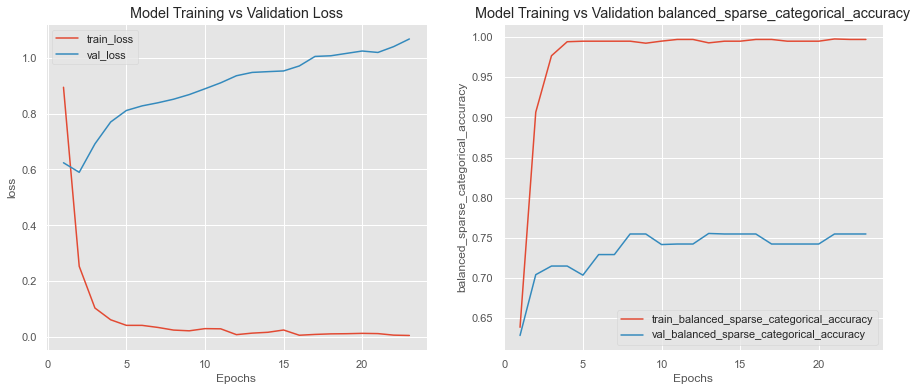

Time taken to train model (in mins) = 12
    Stopped epoch = 23
Held out data actuals shape: (82,)
Printing 10 samples from labels data:
tf.Tensor([0 1 1 1 0 0 0 0 1 1], shape=(10,), dtype=int64)

Held out predictions shape:(82,)
    Sample predictions: [0 1 1 1 0 0 0 0 1 1]

###########################################################
         Held-out test data set Results:


Binary Class Model Metrics Report
#####################################################
    Accuracy          = 75.6%
    Balanced Accuracy = 75.3%
    Precision         = 77.1%
    Average Precision = 75.8%
    Recall            = 69.2%
    F1 Score          = 73.0%
    ROC AUC           = 84.5%
#####################################################

Training full train dataset. This will take time...
    best learning rate = 0.039921366
    set learning rate using best model: 0.039921366
    max epochs for training = 23

Model not being saved since save_model_flag set to False...
1205

Saving vocab dictionary using pickle in churn\cat_vocab_dict.pickle...will take time...
    Saved pickle file in churn\cat_vocab_dict.pickle

Saving variable definitions file using pickle in churn\var_df.pickle...will take time...
    Saved pickle file in churn\var_df.pickle

Deep_Auto_ViML completed. Total time taken = 14 (in mins)


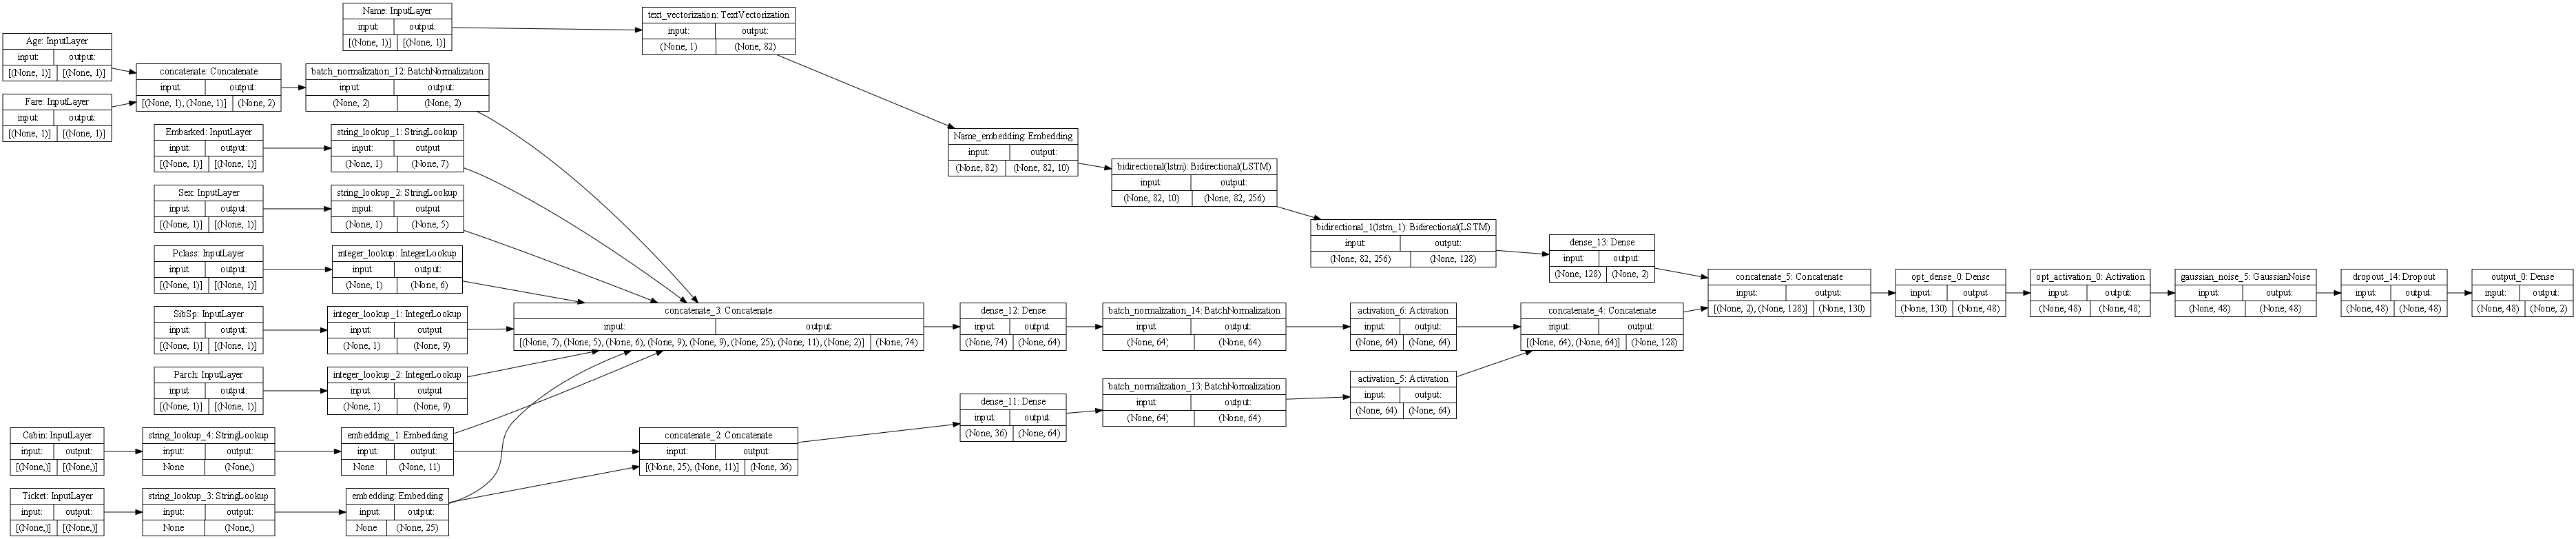

Model plot saved in file: deep_autoviml_churn_auto_model_after.png


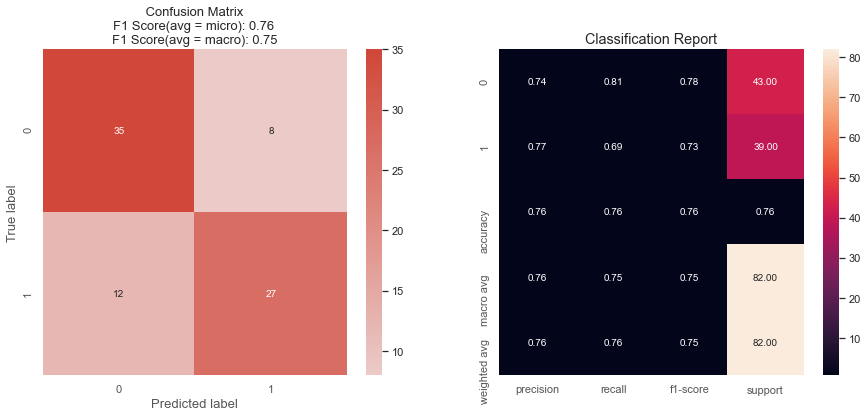

In [6]:
output = deepauto.fit(train, target, keras_model_type,project_name=project_name, keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=1)

In [7]:
model = output[0]
cat_vocab_dict = output[1]

In [8]:
y_preds = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x0000022FAE572F10> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 53
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    12 Predictors classified...
        2 variable(s) to be removed since they were ID or low-information variables
    Dropping ['PassengerId'] columns from dataset...
    test data loaded successfully.
test data size =  53 , batch_size =  41
    number of steps needed to predict: 2
    Sample predictions before inverse_transform: [1 0 0 0 1]
    Sample predictions after transform: [1 0 0 0 1]
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [9]:
y_test = test[target].values
y_test.shape

(53,)

In [10]:
y_preds[0].shape

(53, 2)

In [11]:
from deep_autoviml.utilities.utilities import print_classification_model_stats, print_regression_model_stats

In [12]:
#print_regression_model_stats(y_test, y_preds[0])
print_classification_model_stats(y_test, y_preds[1])

Balanced Accuracy = 82.95%
Confusion Matrix:
[[30  3]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.83      0.75      0.79        20

    accuracy                           0.85        53
   macro avg       0.85      0.83      0.84        53
weighted avg       0.85      0.85      0.85        53

#####################################################################


0.8295454545454546